<a href="https://colab.research.google.com/github/SerasLain/ML_2019/blob/master/assignment2_no_free_lunch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2


Demostrate consequences of No Free Lunch Theorem: every model of machine learning makes assumptions about dataset properties. If the assumption fails, model perfoms badly. If the assumption is met, model perfoms good.

For each of the tasks, described below:

1. create a dataset to meet the description. For demonstration purposes, feature dimension size = 2
2. train the models and evaluate accuracy. (with a training pipeline, described in the seminar)
3. Show which model is better.
4. Write what assumptions were used, and why model exibits such behavior.
5. Plot dataset to demonstrate its properties. (Scatter plot, classes with different colors)


Tasks:

1. Create dataset for binary classification task (binary crossentropy), where k-NN perfoms worse than logistic regression

2. Create dataset for binary classification task (binary crossentropy), where logistic regression perfoms worse than k-NN

3. Create dataset for binary classification task (binary crossentropy), where k-NN with cosine distance perfoms better than k-NN with euclidean distance

! If there is no explanation, why one model perfoms better than the other on your dataset, the task does not count.
! if the training pipeline is not used, the task does not count.

Сделаем заготовку для датасета - координаты 250 000 точек с целыми координатами на плоскости.

In [1]:
import pandas as pd

data = []
for i in range(0, 500):
    for f in range(0, 500):
        data.append((i, f))
dummy = pd.DataFrame(data)
dummy.tail()

,0,1
249995,499,495
249996,499,496
249997,499,497
249998,499,498
249999,499,499


In [2]:
dummy.shape

(250000, 2)

Text(0.5, 1.0, 'Цвет каждой точки по строке-ключу')

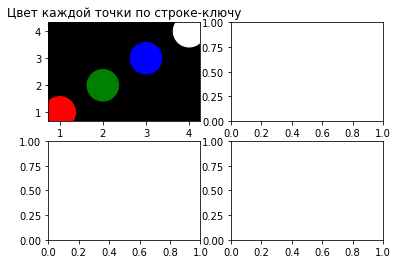

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

fig, axes = plt.subplots(2, 2)


axes[0][0].scatter(x, y,
                   c = ['r', 'g', 'b', 'w'],
                   s = 1000)
axes[0][0].set_facecolor('black')
axes[0][0].set_title('Цвет каждой точки по строке-ключу')


In [33]:
axes[0][1]

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

def estimate(df, feature_names, target, random_state=42):
    fig, ax = plt.subplots(1, 2)

    #Делим на train и test
    X_train, X_test, y_train, y_test = train_test_split(
        df[feature_names], df[target], test_size=0.4, random_state=random_state)
    lr = LogisticRegression()
    # Подбираем гиперпараметры при помощи GridSearch с кросс-валидацией
    gs_lr = GridSearchCV(lr, {'C': [1e-1, 1]}, cv=5)
    gs_lr.fit(X_train, y=y_train)
    # считаем скор
    lr_score = gs_lr.best_estimator_.score(X_test, y_test)
    lr_predicted = gs_lr.best_estimator_.predict(X_test)
    a = ax[0]
    print(a)
    plot_confusion_matrix(y_test, lr_predicted, ['1', '0'], fig, a, 
                          title='LogisticRegression')

    knn = KNeighborsClassifier()
    gs_knn = GridSearchCV(knn, {'n_neighbors': range(3,10), 
                                'weights':['uniform', 'distance']}, cv=5)
    gs_knn.fit(X_train, y=y_train)
    knn_predicted = gs_knn.best_estimator_.predict(X_test)
    a = ax[1]
    plot_confusion_matrix(y_test, knn_predicted, ['1', '0'], fig, a, 
                          title='KNN')
    
    knn_score = gs_knn.best_estimator_.score(X_test, y_test)

    return lr_score, knn_score


def plot_confusion_matrix(y_true, y_pred, classes, fig, ax,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)

    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax




## Let LogisticRegression beat KNN!

KNN основан на ближайших соседях, значит, если данные будут расположены не скученно, то он не будет хорошо работать.

In [0]:
knn_ds = dummy.copy()

In [0]:
from math import sin
diag = []
for i in knn_ds.itertuples():
    if i[1] <= (250 + 250*sin(i[0])):
        diag.append(1)
    else:
        diag.append(0)

In [0]:
knn_ds['diagonal'] = diag

In [11]:
knn_ds.head()

,0,1,diagonal
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1


In [12]:
set(diag)

{0, 1}

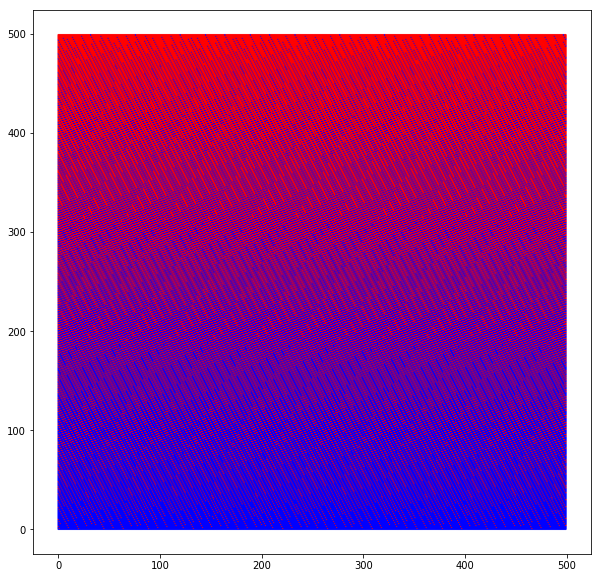

In [13]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(10)

colors = []
for i in diag:
    if i == 0:
        colors.append('red')
    else:
        colors.append('blue')
ax.scatter(knn_ds[1], knn_ds[0],
           c=colors, s=1, alpha=0.8)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

AxesSubplot(0.125,0.125;0.352273x0.755)
Confusion matrix, without normalization
Confusion matrix, without normalization


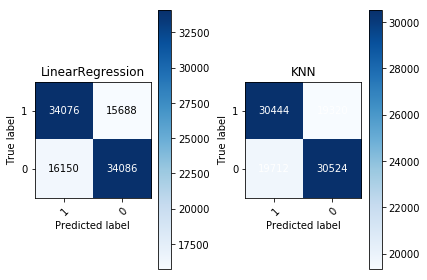

In [42]:
ls, knn = estimate(knn_ds, [0, 1], 'diagonal')

In [43]:
print('LogisticRegression score: ', ls)
print('KNN score: ', knn)

LogisticRegression score:  0.68162
KNN score:  0.60968


ЧТД: KNN сработал хуже логистической регрессии. Данные разделены синусоидой, из-за этого в точках, расположенных близко к перегибам синусоиды, ближайшие соседи часто бывают "несогласны" между собой, и алгоритму приходится это как-то разрешать. Логистическая регрессия ищет линию, которая могла бы разделить точки на два класса, и у нее больше шансов ее найти, так как я заранее искусственно поделила эти данные при помощи линии.

## Let's get down the LogisticRegression!

Логистическая регрессия пытается найти прямую, которой можно было бы разделить точки на два класса — значит, чтобы она не работала, нужно, чтобы нельзя было так разделить точки. Отнесем точки из области в центре к одному классу, а точки из области по краям — к другому.

In [44]:
a = 500 / 4
st, fi = a, 500 - a

is_central = []
for row in dummy.itertuples():
    if (row[1] > st) and (row[1] < fi) and (row[2] > st) and (row[2] < fi):
        is_central.append(1)
    else:
        is_central.append(0)

print(len(is_central))

LogRegr = dummy.copy()
LogRegr['central'] = is_central
LogRegr.head()

250000


,0,1,central
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0


Теперь датасет выглядит так. Его невозможно хорошо линейно разделить!

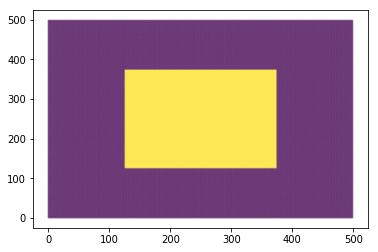

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
colors = is_central

ax.scatter(LogRegr[0], LogRegr[1],
           c = colors, s=0.2, alpha=0.2)



Проверим, как справляются модели.

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

#Делим на train и test
X_train, X_test, y_train, y_test = train_test_split(
    LogRegr[[0, 1]], LogRegr['central'], test_size=0.4, random_state=42)


In [73]:
X_train.shape

(150000, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

AxesSubplot(0.125,0.125;0.352273x0.755)
Confusion matrix, without normalization
Confusion matrix, without normalization


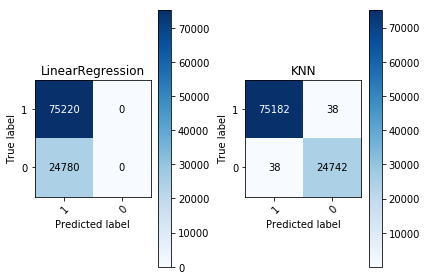

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
lr, knn = estimate(LogRegr, [0, 1], 'central')

In [48]:
print('LogisticRegression score: ', ls)
print('KNN score: ', knn)

LogisticRegression score:  0.68162
KNN score:  0.99924


KNN работает лучше, чем логистическая регрессия, как мы и ожидали, ура!

## Евклидова метрика против косинусной

Евклидова метрика основывается на удаленности точек в пространстве, а косинусная — на величине угла между векторами от нуля до каждой из этих точек. Косинусная будет работать лучше евклидовой, если все точки одного класса будут удалены друг от друга, но при этом находиться в каком-то одном секторе в пространстве

In [0]:
def cos_sim(v1, v2):
    """Counts cosine similarity between two vectors"""
    return np.inner(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))